# This notebook demonstrates how to propagate errors in Cpx-Liquid thermobarometry
- This builds on from the notebook showing how to consider error in a single phase (Liquid_Thermometry_Error_prop.ipynb). We suggest you look at that first, as its simpler when you don't have to worry about two separate phases
- We use the experimental data of Feig et al. (2010) - DOI 10.1007/s00410-010-0493-3, and the author-stated 1 sigma errors

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None

In [2]:
# Importing data

out=pt.import_Excel('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Importing errors (in publication, given as absolute errors for each oxide based on averaging of products within each experiment)

out_Err=pt.import_Excel_Errors('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
myLiquids1_Err=out_Err['Liqs_Err']
myCpxs1_Err=out_Err['Cpxs_Err']
myinput_Out=out_Err['my_input_Err']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Example 1: Uncertainty in a single input parameter
- Here, we consider the effect of adding just 5% noise to measured Na2O contents of Cpx (a fairly typical uncertainty resulting from EPMA analyses)
- Because our liquids and cpx dataframes need to be the same size to feed into the calculate_Cpx_Liq functions, we also use the Add_Sample_Noise_1Phase to generate a dataframe of Liq compositions, however, we simply state noise_percent=0 so all the rows for each liquid are identical

In [4]:
# Making a liquid dataframe which is the right length, but has no noise
Liquids_only_noNoise=pt.Add_Sample_Noise_1Phase(Phase_Comp=myLiquids1, noise_percent=0, duplicates=1000, Err_dist="normal")

In [5]:
# Add 5% noise to Na2O in Cpx

Cpx_5Na2O=pt.Add_Sample_Noise_1Phase(Phase_Comp=myCpxs1, Variable="Na2O", Variable_Err=5, 
                                              Variable_Err_type="Perc", duplicates=1000, 
                                             Err_dist="normal")
Cpx_5Na2O.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,P_kbar,T_K,Sample_ID_Cpx_Num
0,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.299390,0.0,0.252186,0.0,1.0,1293.15,0.0
1,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.328392,0.0,0.252186,0.0,1.0,1293.15,0.0
2,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.331018,0.0,0.252186,0.0,1.0,1293.15,0.0
3,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.308058,0.0,0.252186,0.0,1.0,1293.15,0.0
4,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.317557,0.0,0.252186,0.0,1.0,1293.15,0.0


## Now we input these two new dataframes into the function for calculating P and T iteratively using two equations
- here, T=equation 33 from Putirka 2008, P=Equation 31 from Putirka 2008

In [6]:
Out_5_noise_cpx=pt.calculate_Cpx_Liq_PT_Iter(Liq_Comps=Liquids_only_noNoise, Cpx_Comps=Cpx_5Na2O, 
                                    equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", Eq_Tests=True)

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using Fe3FeT from input file to calculate Kd Fe-Mg


## Each histogram shows the pressure distribution from a single Cpx-Liquid pair resulting from adding 5% error.  

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


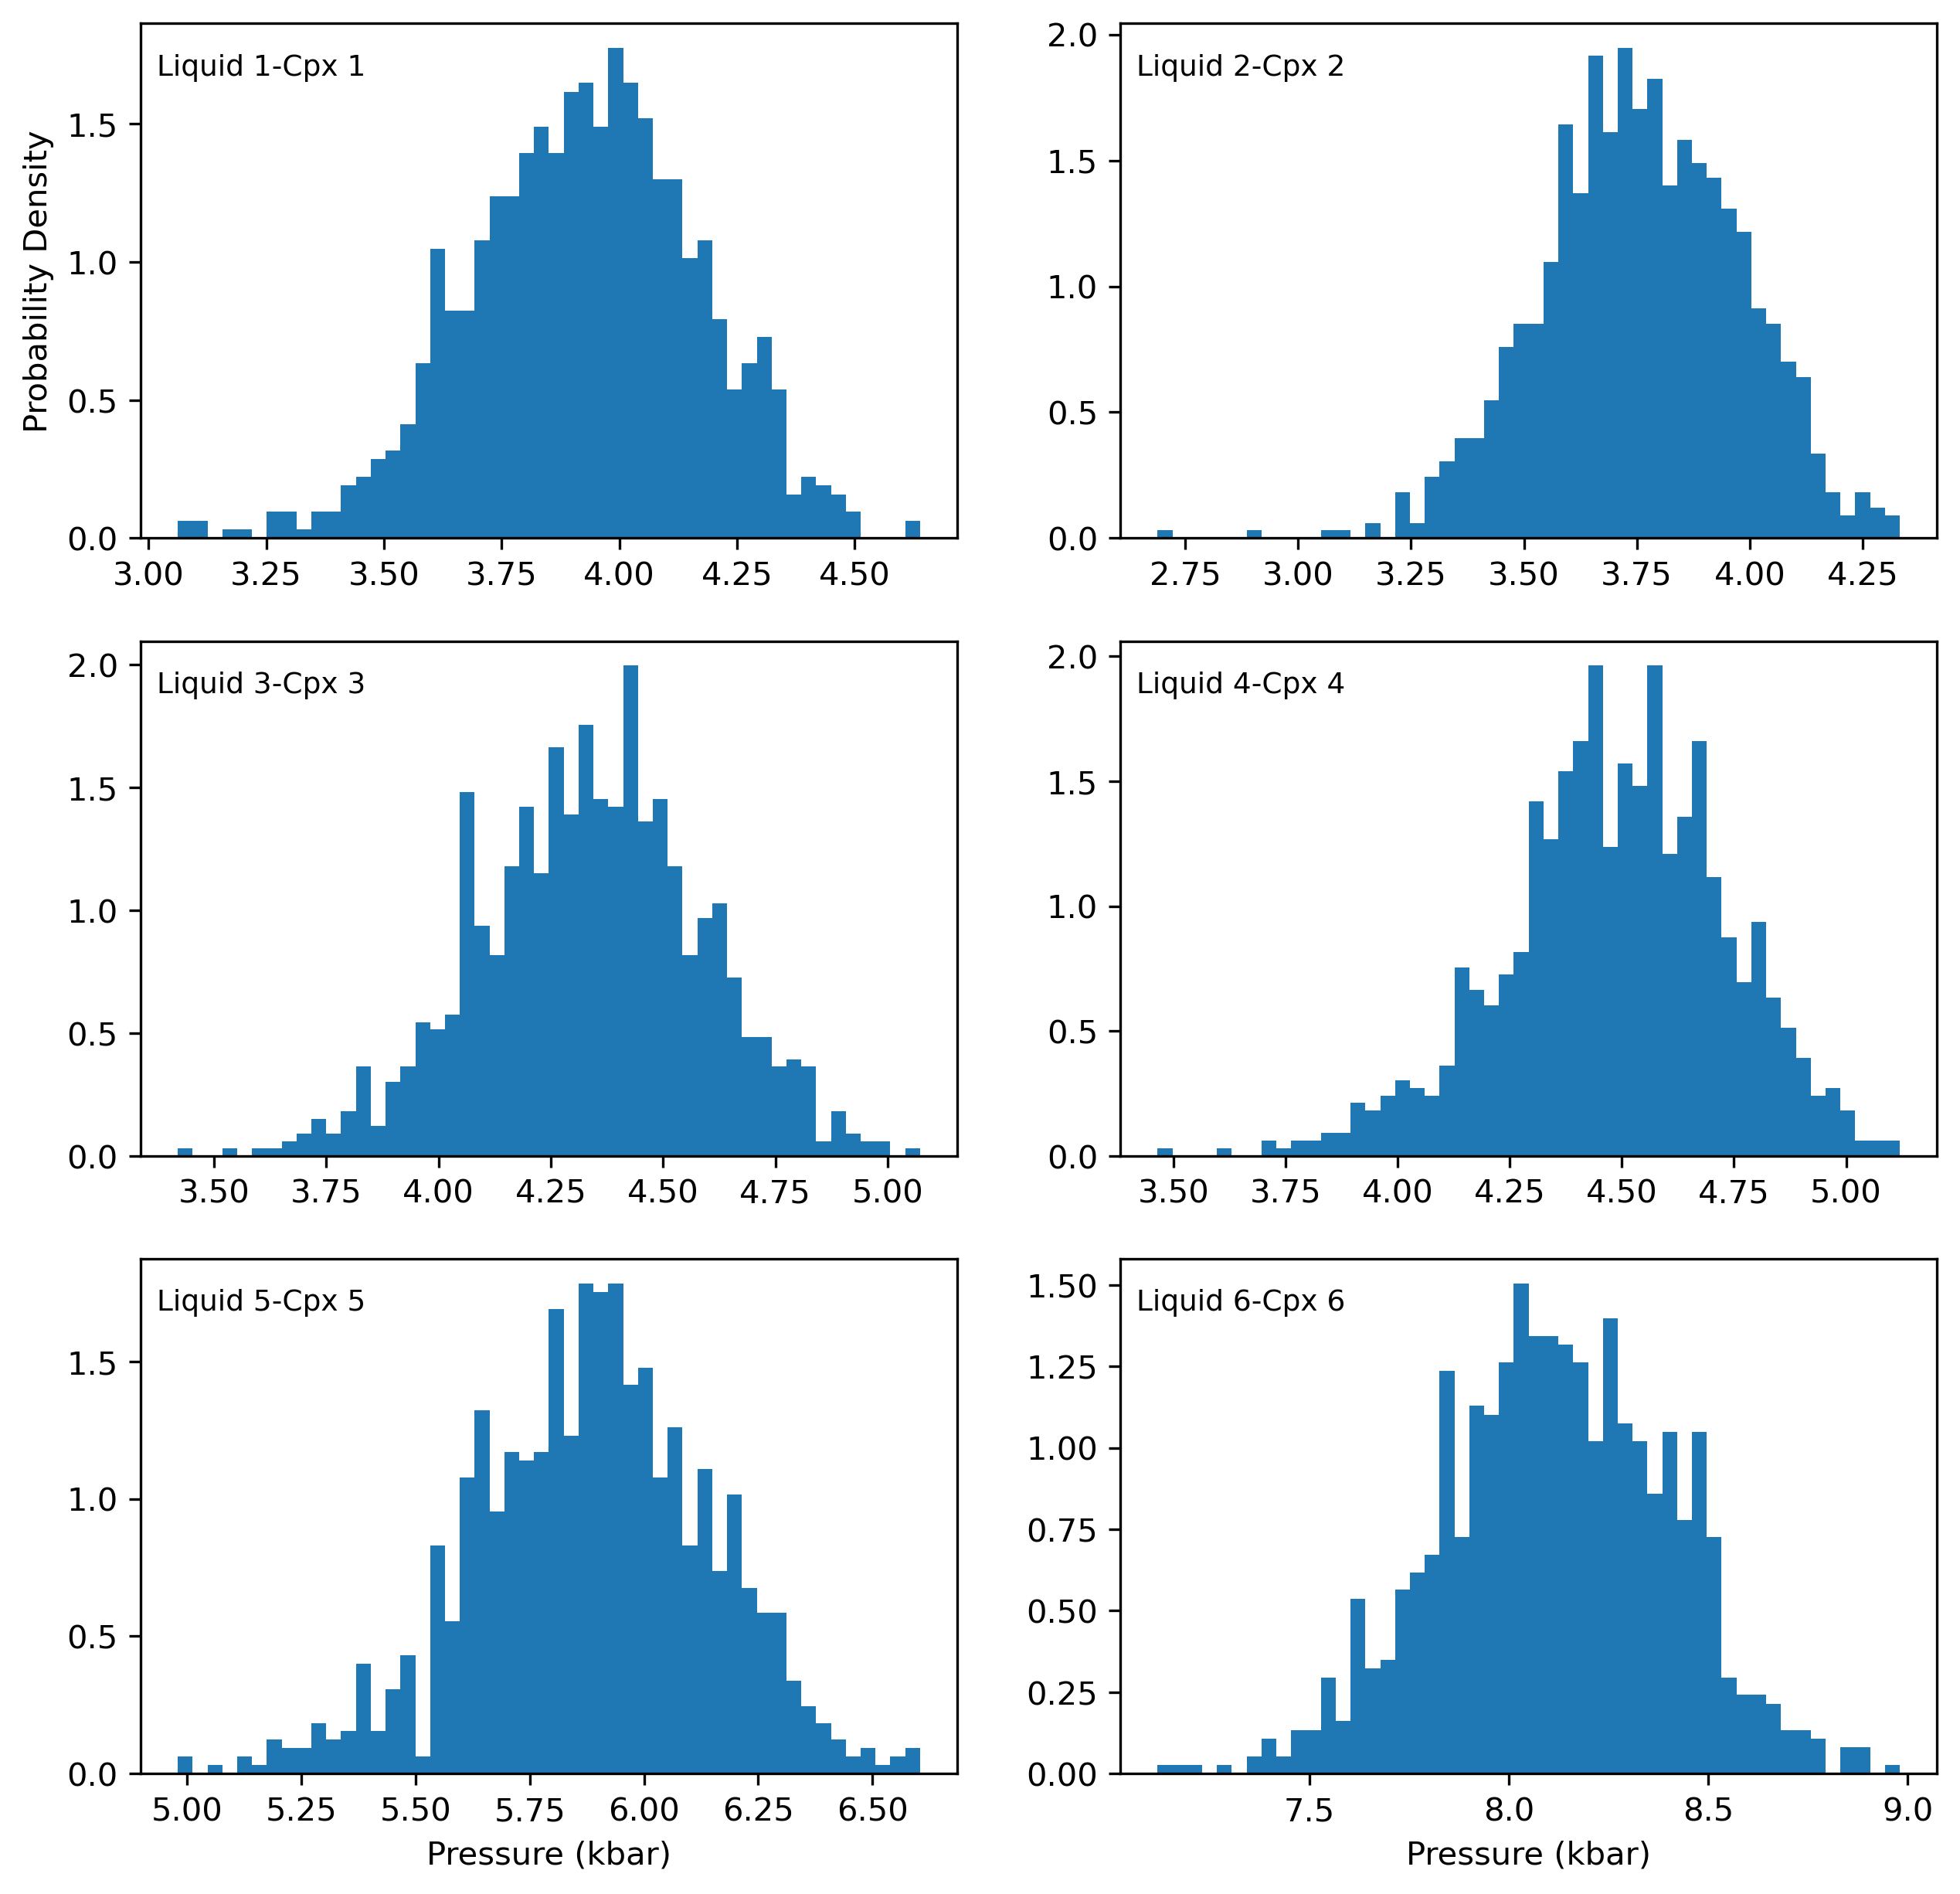

In [8]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 300

## We can plot the same diagram but for temperatures

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


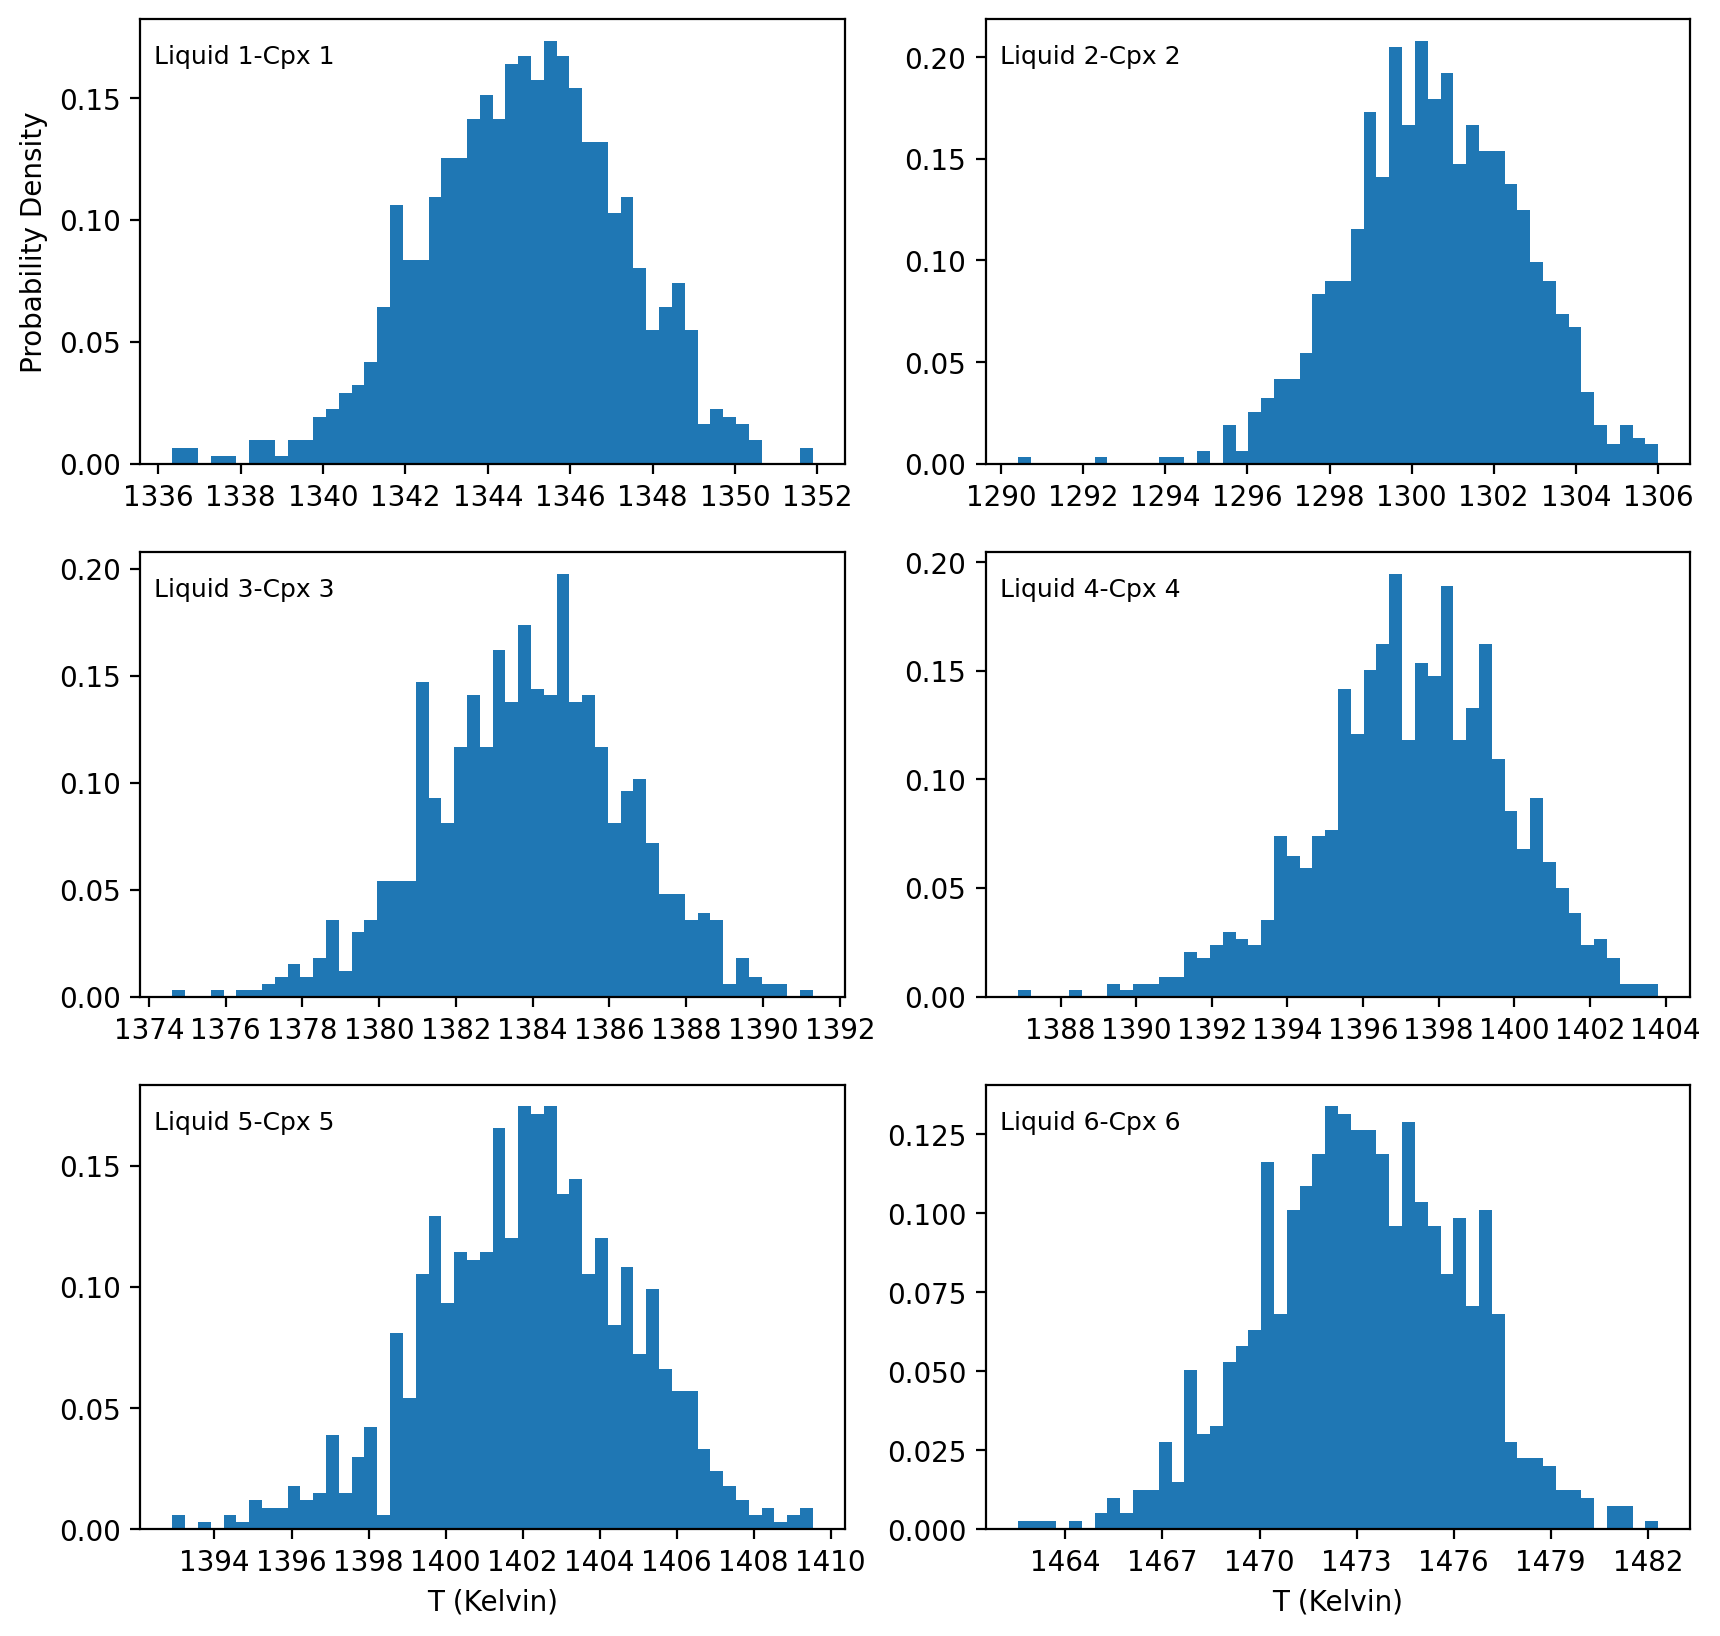

In [10]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax5.set_xlabel('T (Kelvin)')
ax6.set_xlabel('T (Kelvin)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 200
from pylab import MaxNLocator
ax1.xaxis.set_major_locator(MaxNLocator(integer = True))
ax2.xaxis.set_major_locator(MaxNLocator(integer = True))
ax3.xaxis.set_major_locator(MaxNLocator(integer = True))
ax4.xaxis.set_major_locator(MaxNLocator(integer = True))
ax5.xaxis.set_major_locator(MaxNLocator(integer = True))
ax6.xaxis.set_major_locator(MaxNLocator(integer = True))

### Again, we can use the function Av_Noise_Samples to calculate the mean, median, max, min and standard deviation 

In [11]:
Stats_T_K=pt.Av_Noise_Samples_series(Out_5_noise_cpx['T_K_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_T_K

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.858794,1344.926119,2.402515,1351.890718,1336.339451
1,1.0,1300.563746,1300.523901,2.089150,1306.008967,1290.404476
2,2.0,1383.877697,1383.907836,2.535327,1391.296937,1374.613121
3,3.0,1397.305343,1397.424091,2.540811,1403.808467,1386.865749
4,4.0,1402.163515,1402.274963,2.656144,1409.539289,1392.904801
5,5.0,1473.130865,1473.125369,3.080148,1482.325415,1462.526980
6,6.0,1480.533228,1480.689102,3.175576,1490.122930,1469.395312


In [12]:
Stats_P_kbar=pt.Av_Noise_Samples_series(Out_5_noise_cpx['P_kbar_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_P_kbar

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.925862,3.932696,0.243563,4.638713,3.062014
1,1.0,3.758456,3.754230,0.220048,4.332212,2.688804
2,2.0,4.337270,4.340259,0.251090,5.072063,3.419600
3,3.0,4.484634,4.496251,0.248186,5.119768,3.464526
4,4.0,5.883803,5.894686,0.259533,6.604578,4.979102
5,5.0,8.115506,8.114952,0.289436,8.979895,7.119338
6,6.0,6.195398,6.209698,0.289107,7.067522,5.180174


# Example 2 - published absolute 1 sigma values for all oxides
- Here, we use the 1 sigma values for each oxide in both the glass and cpx reported by Feig et al. 2010
- We make a noisy dataframe of the same length for liquids and cpxs, then combine them into the function for iterating P and T

In [13]:
Liquids_st_noise=pt.Add_Sample_Noise_1Phase(Phase_Comp=myLiquids1, Phase_Err=myLiquids1_Err,
                                             Phase_Err_type="Abs", duplicates=1000, Err_dist="normal")

Cpxs_st_noise=pt.Add_Sample_Noise_1Phase(Phase_Comp=myCpxs1, Phase_Err=myCpxs1_Err,
                                             Phase_Err_type="Abs", duplicates=1000, Err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set Positive=False
All negative numbers replaced with zeros. If you wish to keep these, set Positive=False


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
Out_st_noise=pt.calculate_Cpx_Liq_PT_Iter(Liq_Comps=Liquids_st_noise, Cpx_Comps=Cpxs_st_noise, 
                                    equationP="P_Put2008_eq31", 
                                             equationT="T_Put2008_eq33", Eq_Tests=True, iterations=50)


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
Stats_T_K=pt.Av_Noise_Samples_series(Out_st_noise['T_K_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_T_K

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.983403,1344.925198,11.419951,1382.137701,1304.585325
1,1.0,1298.082888,1299.360587,16.218185,1339.230710,1131.299634
2,2.0,1380.105509,1382.610109,22.593824,1442.117489,1267.115891
3,3.0,1396.816118,1397.532825,10.466920,1423.083054,1358.436797
4,4.0,1402.110748,1402.378705,11.038762,1438.211180,1355.808781
5,5.0,1472.648868,1472.427840,6.505977,1495.526572,1453.875112
6,6.0,1480.505084,1480.607819,8.657685,1510.696396,1452.896984


In [16]:
Stats_P_kbar=pt.Av_Noise_Samples_series(Out_st_noise['P_kbar_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_P_kbar

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.910381,3.922132,0.856855,6.440323,-0.599684
1,1.0,3.541904,3.745220,1.480242,6.098330,-15.305701
2,2.0,3.971175,4.248600,2.071958,9.245693,-6.904264
3,3.0,4.456425,4.513786,0.896700,6.963784,0.700440
4,4.0,5.875544,5.962165,0.936702,8.977421,2.054033
5,5.0,8.082142,8.072224,0.458467,9.414356,6.517668
6,6.0,6.220119,6.226850,0.497085,7.655775,4.594976


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

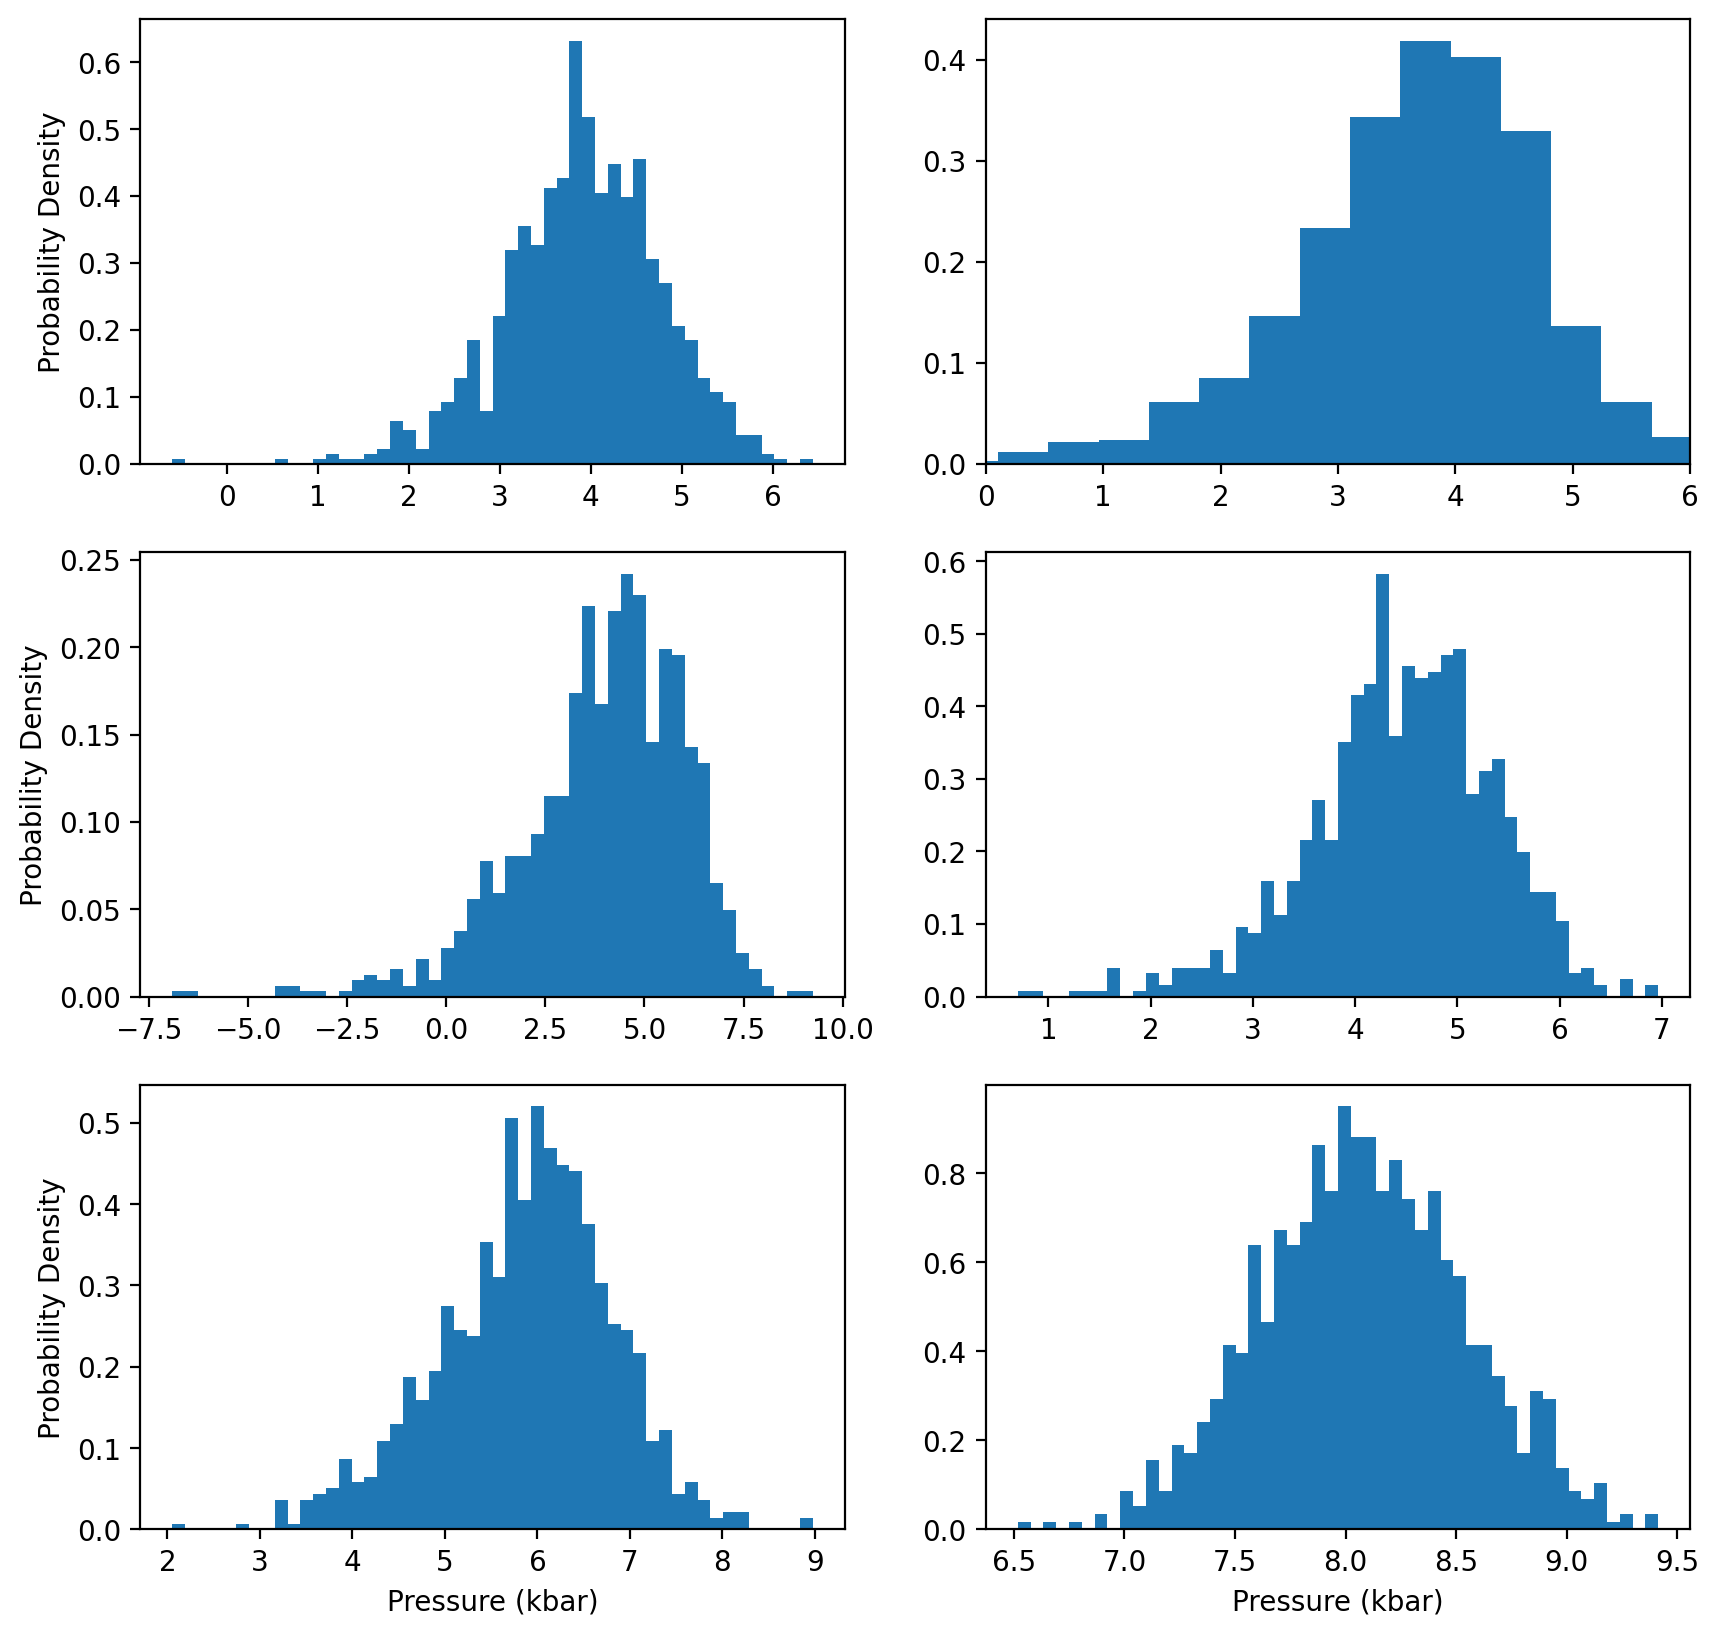

In [25]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax2.set_xlim([0, 6])
ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

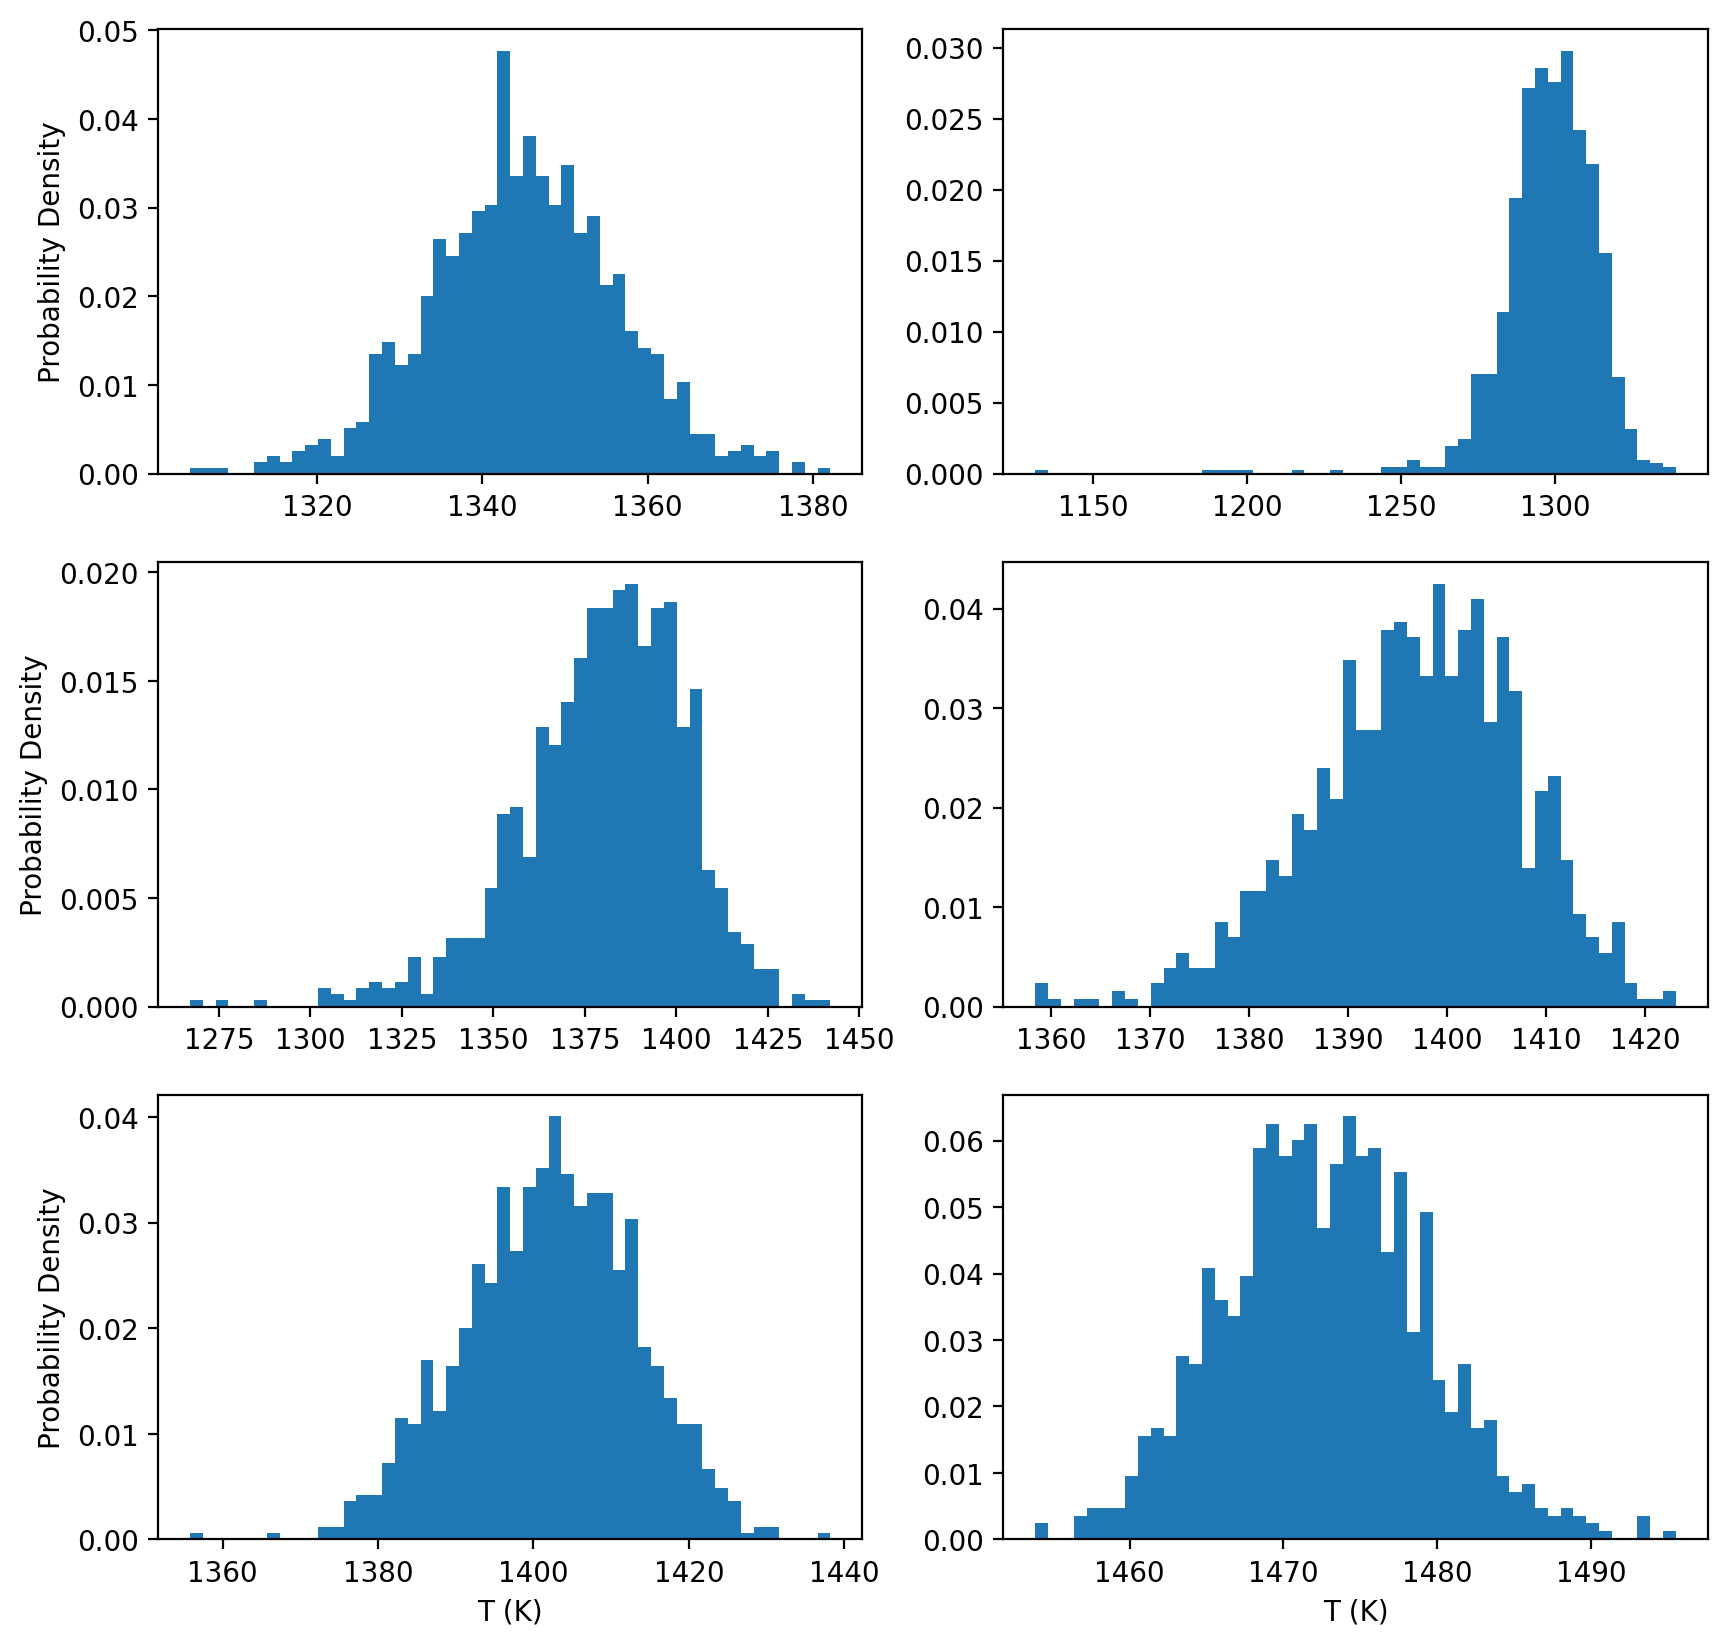

In [24]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

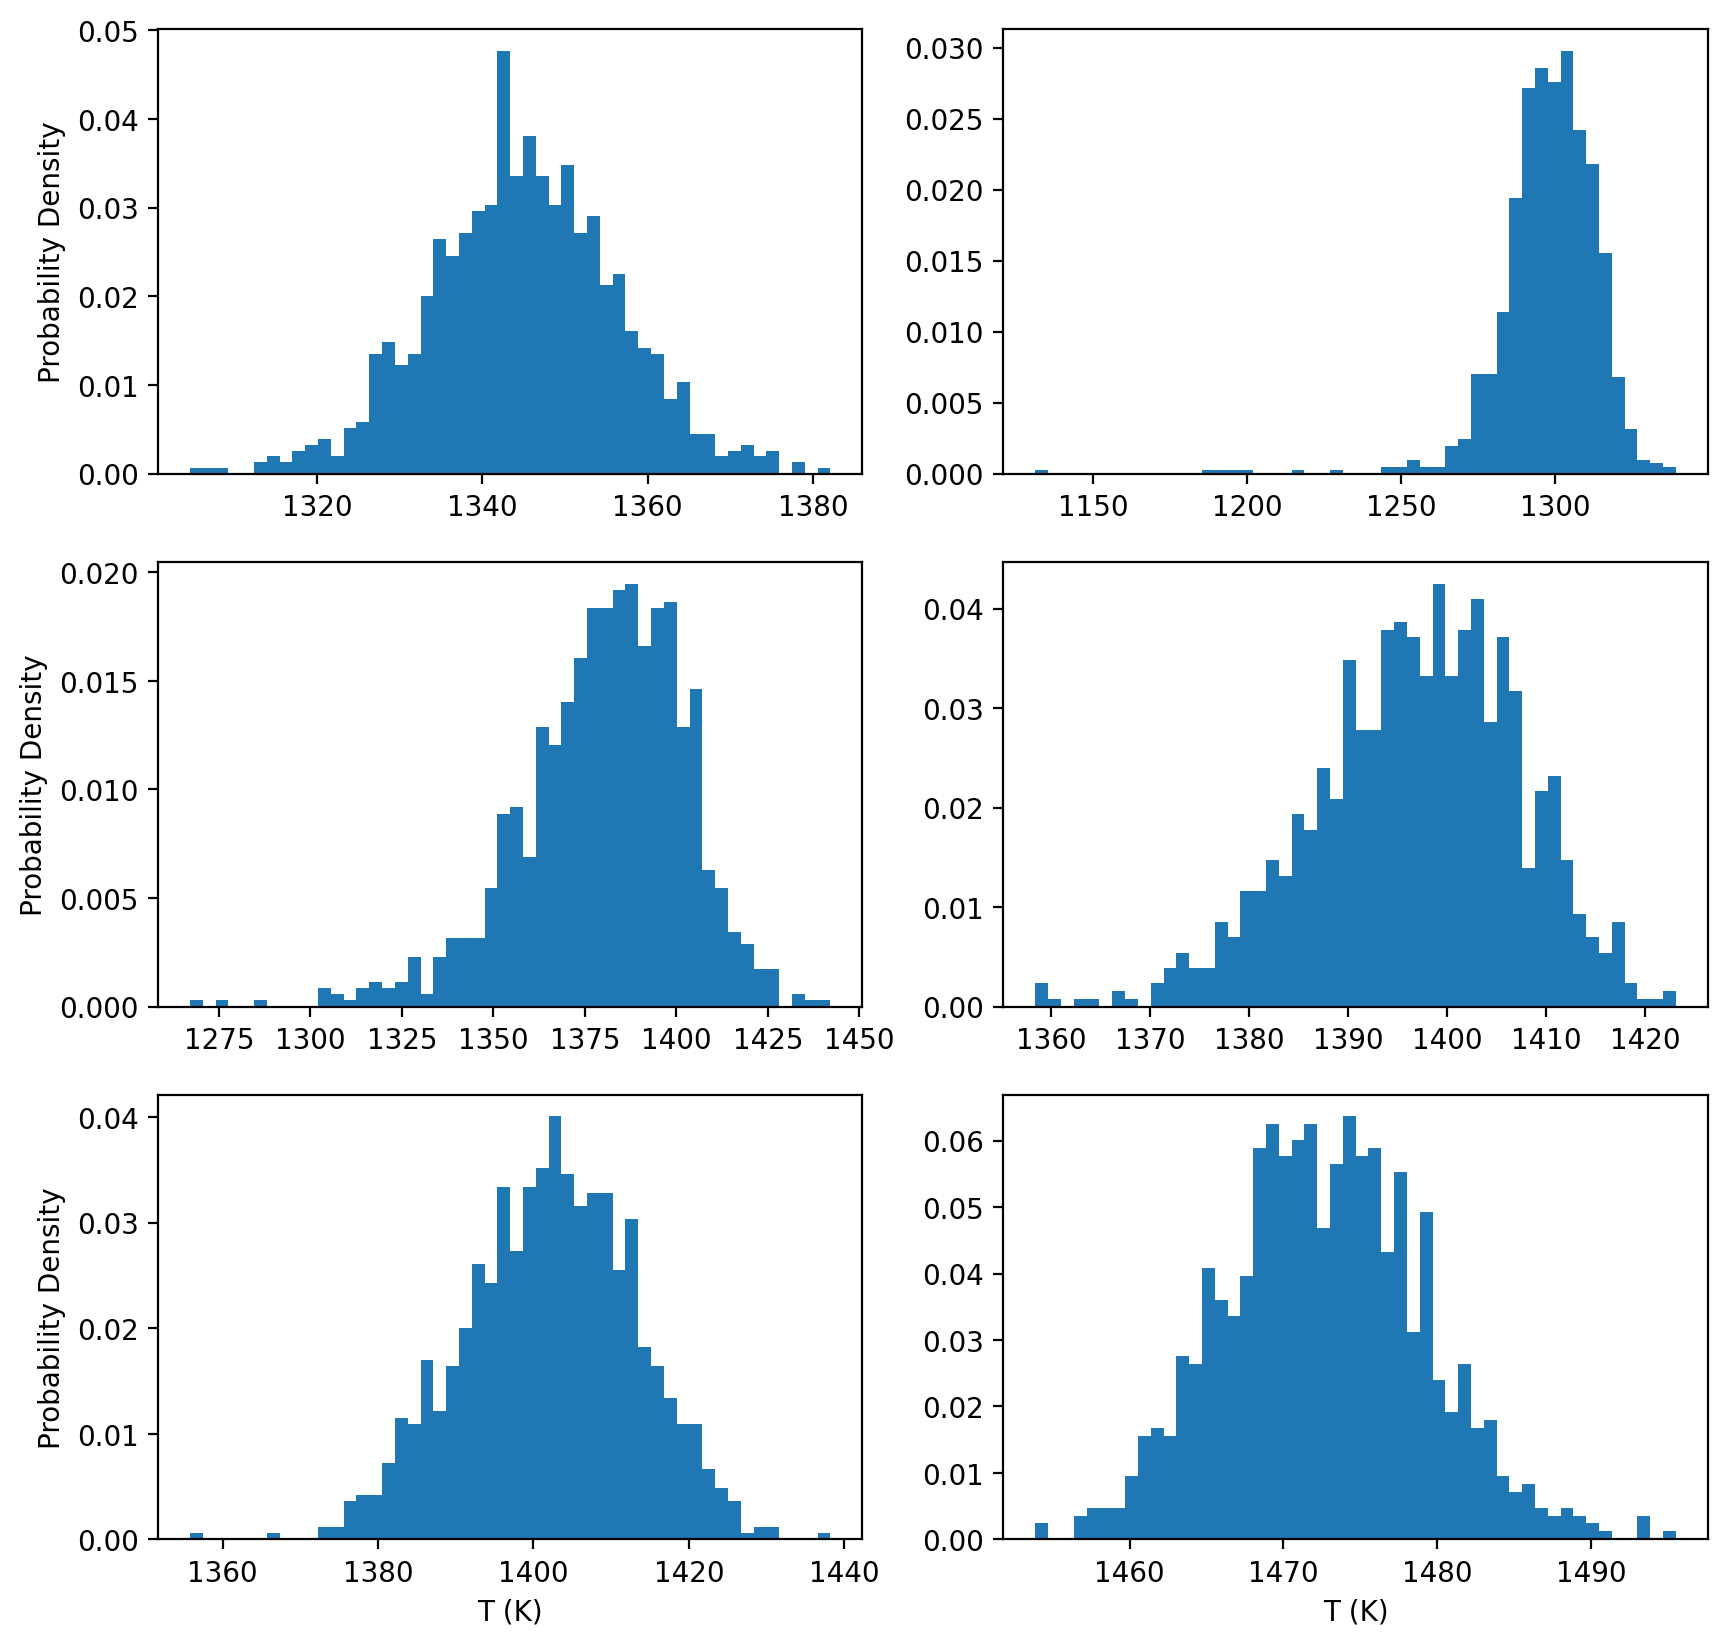

In [23]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')